In [6]:
# Step 1: Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Step 2: Load raw data

csv_data = pd.read_csv(r"C:\Program Files\Ampps\www\Projects\graduate-admission-probability-predictor\data\raw\education_admission.csv")

In [8]:
# Step 3: Data Overview
csv_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# Step 4: Perform EDA

In [35]:
csv_data.shape

(500, 9)

In [37]:
csv_data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [38]:
csv_data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [39]:
# Dropping Serial No. column

csv_data.drop(columns='Serial No.', inplace=True)

In [40]:
csv_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [43]:
csv_data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [44]:
csv_data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


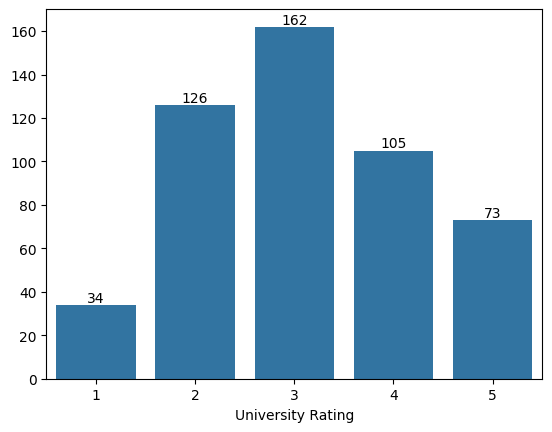

In [41]:
ax = sns.barplot(x=csv_data['University Rating'].value_counts().index,y = csv_data['University Rating'].value_counts().values)
plt.bar_label(ax.containers[0])
plt.show()

In [29]:
pd.DataFrame((csv_data['University Rating'].value_counts()/csv_data['University Rating'].value_counts().sum())*100).reset_index().rename(columns={'count':'Probability'})

,University Rating,Probability
0,3,32.4
1,2,25.2
2,4,21.0
3,5,14.6
4,1,6.8


<Axes: xlabel='Research'>

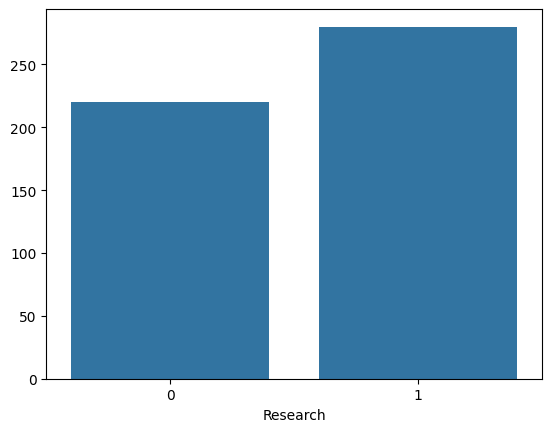

In [14]:
sns.barplot(x=csv_data['Research'].value_counts().index,y = csv_data['Research'].value_counts().values)

In [33]:
pd.DataFrame((csv_data['Research'].value_counts()/csv_data['Research'].value_counts().sum())*100).reset_index().rename(columns={'count':'Probability'})

,Research,Probability
0,1,56.0
1,0,44.0
